In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl  # 한글처리 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

### load dataset

In [3]:
import pandas as pd

In [4]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [5]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

## 단일 변수

In [6]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [7]:
df_TOCC.describe(include=object).columns # .colums .index . values

Index(['type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'payment_type', 'product', 'state', 'overdue', 'bank', 'cancellation'],
      dtype='object')

#### 범주형 : 주로 문자, 항목으로 구성 

In [8]:
df_TOCC['type_of_contract'].value_counts() # 해당 컬럼 안 values 확인 

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

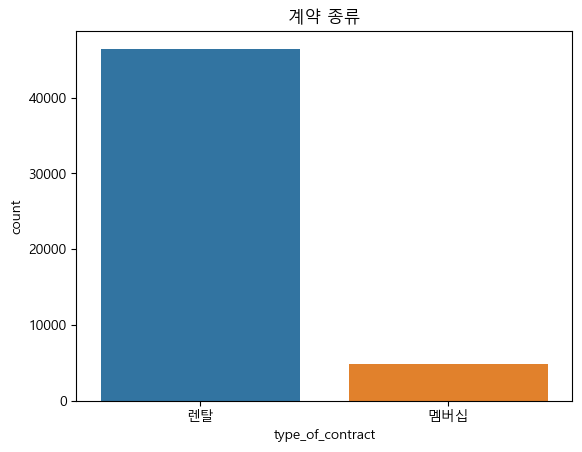

In [9]:
sns.countplot(data=df_TOCC, x='type_of_contract')# 빈도수를 확인 
plt.title("계약 종류")
plt.show()

In [10]:
df_TOCC['type_of_contract2'].value_counts()

Promotion           15811
Normal              15324
Package             10184
Extension_Rental     4975
TAS                  2627
TA2                  2087
Group                 190
TA3                    92
TA1                    13
Name: type_of_contract2, dtype: int64

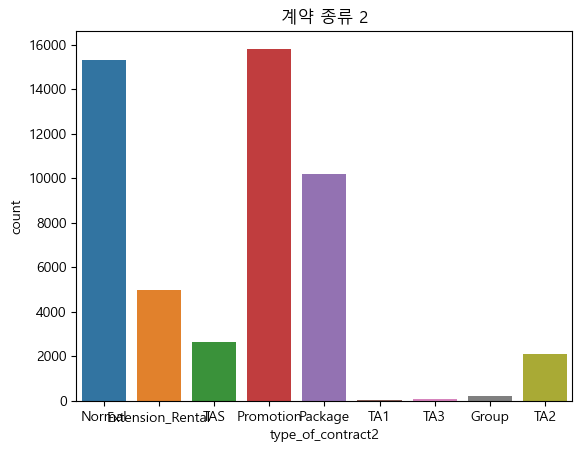

In [11]:
sns.countplot(data=df_TOCC, x='type_of_contract2')
plt.title("계약 종류 2")
plt.show()

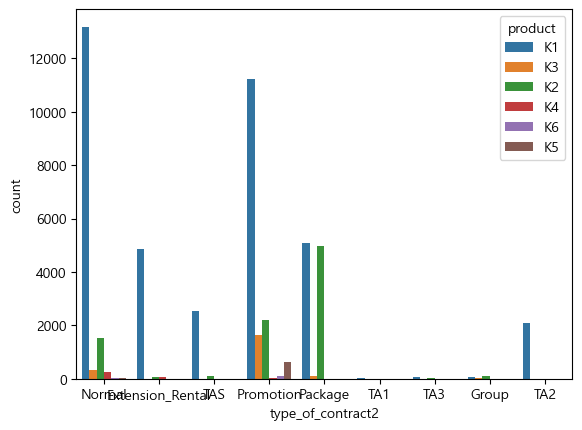

In [12]:
sns.countplot(data=df_TOCC, x='type_of_contract2', hue='product' ) #  hue='' 비교 
plt.show()

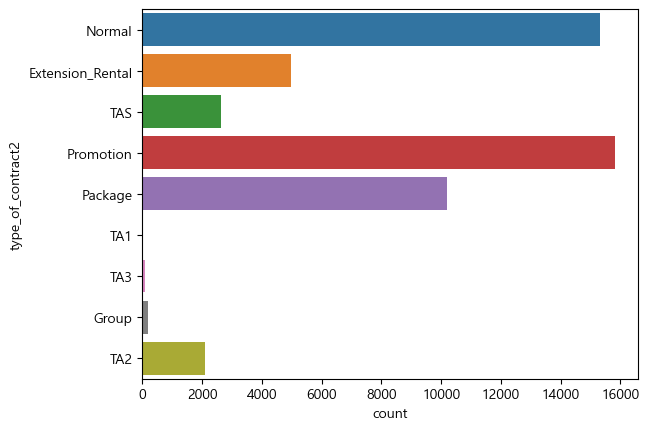

In [13]:
sns.countplot(data=df_TOCC, y='type_of_contract2')
plt.show()

In [14]:
df_TOCC['bank'].value_counts()

국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
NH농협카드          4
한국투자증권          4
신한금융투자          4
우리카드            3
대우증권            2
하이투자증권          1
메리츠종합금융증권       1
수협카드            1
상호저축은행          1
SK증권            1
하나대투증권          1
산림조합중앙회         1
대신증권            1
씨티카드            1
Name: bank, dtype: int64

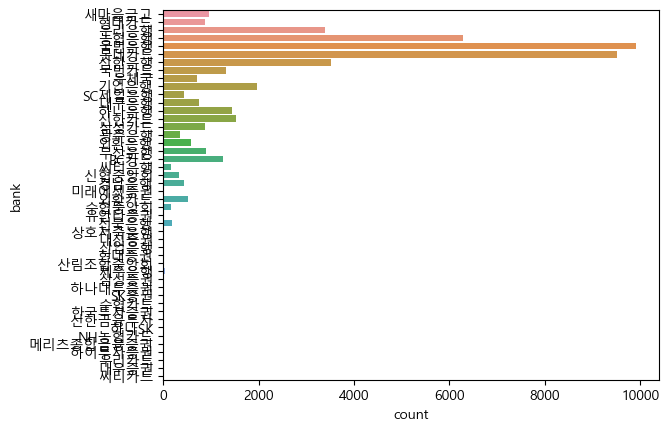

In [15]:
sns.countplot(data=df_TOCC, y='bank')
plt.show()

In [16]:
# 거래 은행 중 상위 7개 확인
df_TOCC['bank'].value_counts().iloc[:7]

국민은행    9901
롯데카드    9518
농협은행    6278
신한은행    3522
우리은행    3386
기업은행    1963
신한카드    1533
Name: bank, dtype: int64

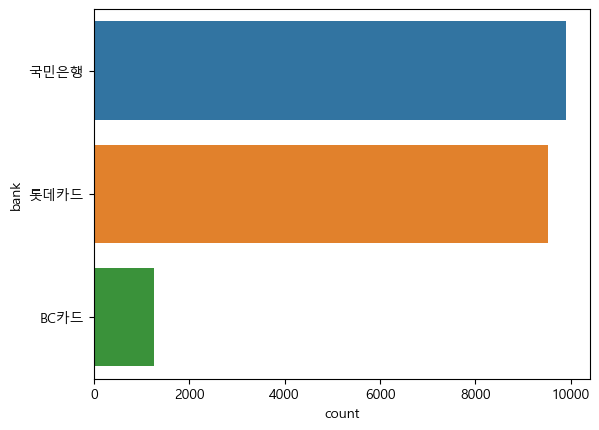

In [17]:
sns.countplot(data=df_TOCC, y='bank', order=['국민은행','롯데카드','BC카드' ]) #원하는 values값만 출력 가능
plt.show()

In [18]:
# -bank column -> 항목 serise -> index 추출 -> list 변환 -> slicing 7
order_list = df_TOCC['bank'].value_counts().index.to_list()[:7]
order_list

['국민은행', '롯데카드', '농협은행', '신한은행', '우리은행', '기업은행', '신한카드']

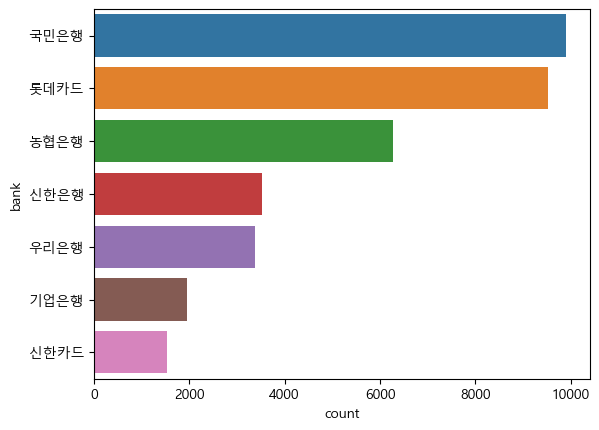

In [19]:
# sns.countplot(data=df_TOCC, y='bank', order=['국민은행','롯데카드','BC카드' ]) #원하는 values값만 출력 가능
sns.countplot(data=df_TOCC, y='bank', order= order_list) 
plt.show()

#### 연속형 : 범주형 아닌 것 

In [20]:
df_TOCC.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


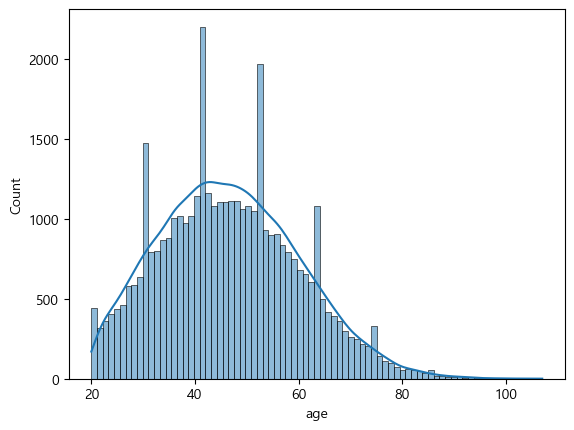

In [21]:
sns.histplot(data=df_TOCC, x= 'age', kde=True) # kde=True 분포에 대한 확률분포를 나타냄
# sns.histplot(data=df_TOCC, x= 'age', hue='type_of_contract2')  # hue= 다변수일때 사용하는 방식
plt.show()

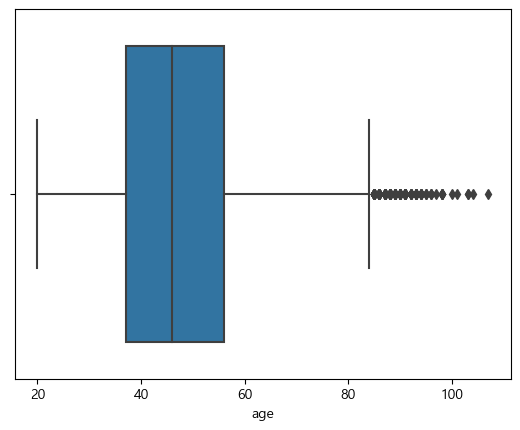

In [22]:
sns.boxplot(data=df_TOCC, x= 'age')
plt.show()

#### IOR

In [23]:
df_TOCC.info

<bound method DataFrame.info of              id type_of_contract type_of_contract2 channel    datetime  Term  \
0      66758234               렌탈            Normal  서비스 방문  2019-10-20    60   
1      66755948               렌탈  Extension_Rental  서비스 방문  2019-10-20    60   
2      66756657               렌탈            Normal  홈쇼핑/방송  2019-10-20    60   
3      66423450              멤버십               TAS   렌탈재계약  2019-10-20    12   
4      66423204              멤버십               TAS   렌탈재계약  2019-10-20    12   
...         ...              ...               ...     ...         ...   ...   
51299  66579515              NaN         Promotion   R관리방판  2020-02-03    60   
51300  66799558               렌탈            Normal    영업방판  2020-02-03    60   
51301  66799197               렌탈         Promotion  홈쇼핑/방송  2020-02-03    39   
51302  66792778              NaN            Normal    렌탈총판  2020-02-03    60   
51303  66799607               렌탈            Normal    하이마트  2020-02-03    60   

      p

## 다변수 

### X(설명변수,범주형) / Y(목표변수,연속형) : 범주형 / 연속형

#### barplot

In [24]:
df_TOCC.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

In [25]:
df_TOCC['amount'].describe()

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

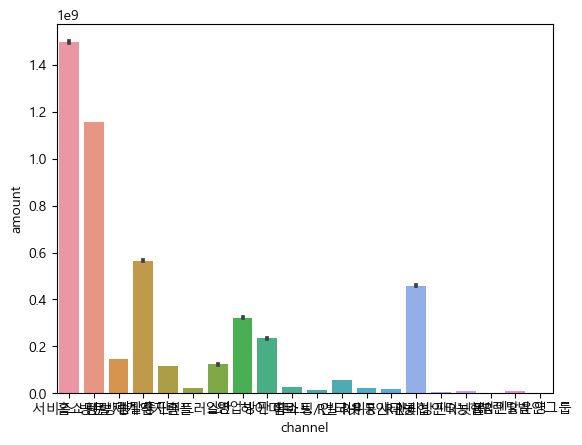

In [26]:
# sns.barplot(data=df_TOCC, x='channel', y='amount' ) # 기본 평균
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum) #기본 총합
plt.show()

In [27]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc='sum' ) #총합으로 요약
df_TOCC_bottom_list = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:].index.to_list()# 정렬 , 하위 7개 추출, list로 추출
df_TOCC_bottom_list

['R인터넷', '홈쇼핑/인터넷', 'R렌탈운영', 'R농협', 'R농협인터넷몰', 'R법인', 'R법인그룹']

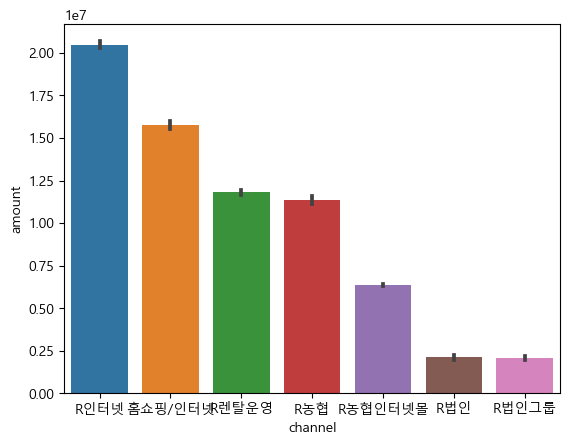

In [28]:
# 총합 하위 7개 순위 시각화
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum, order=df_TOCC_bottom_list) # order 사용 
plt.show()

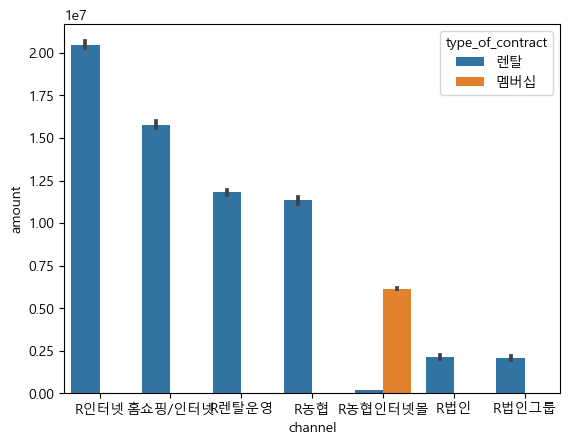

In [29]:
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum, order=df_TOCC_bottom_list, hue='type_of_contract') # 비교 컬럼 추가 
plt.show()

#### boxplot

In [30]:
# 상위 3위
df_TOCC_top_list = df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[:3].index.to_list()
df_TOCC_top_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판']

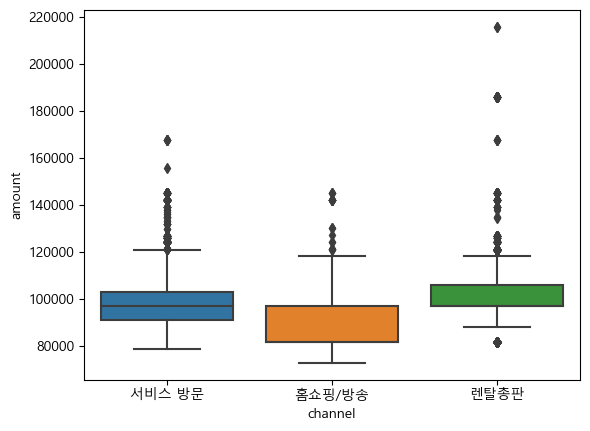

In [31]:
sns.boxplot(data=df_TOCC, x='channel', y='amount', order=df_TOCC_top_list)
plt.show()

### X(설명변수,연속형) / Y(목표변수,연속형) : 연속형 / 연속형

#### scatterplot

In [32]:
df_TOCC.describe()[:2]

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.00000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.16104,3.428894,46.608285,1967.922412


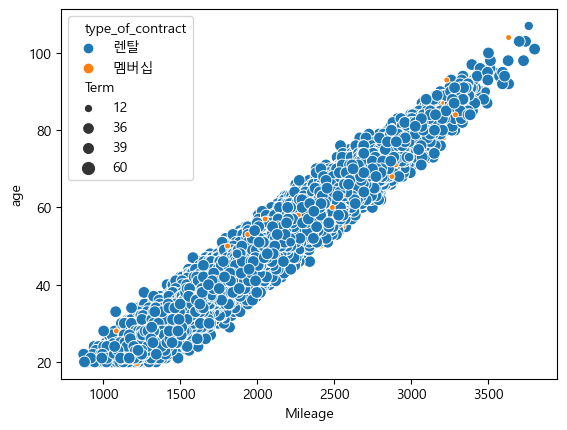

In [33]:
sns.scatterplot(data=df_TOCC, x='Mileage', y='age', hue='type_of_contract', size='Term')
plt.show()
# 분석 : Mileage가 많을수록 age가 많다., 25~35세 사이 고객 타겟팅

#### lmplot

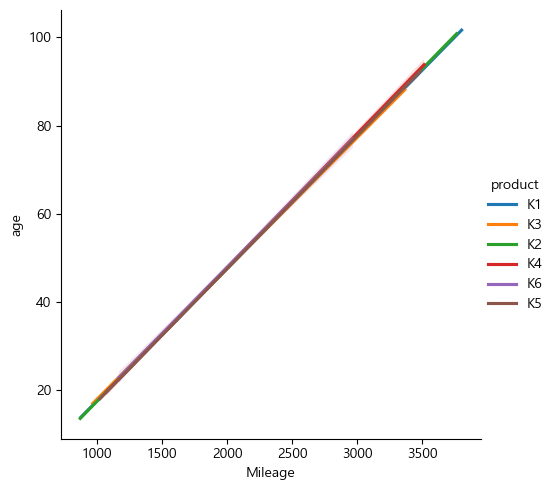

In [34]:
sns.lmplot(data=df_TOCC, x='Mileage', y='age', hue='product', scatter=False) # scatter=False 중앙선 분포의 선 긋기
plt.show()

#### jointplot

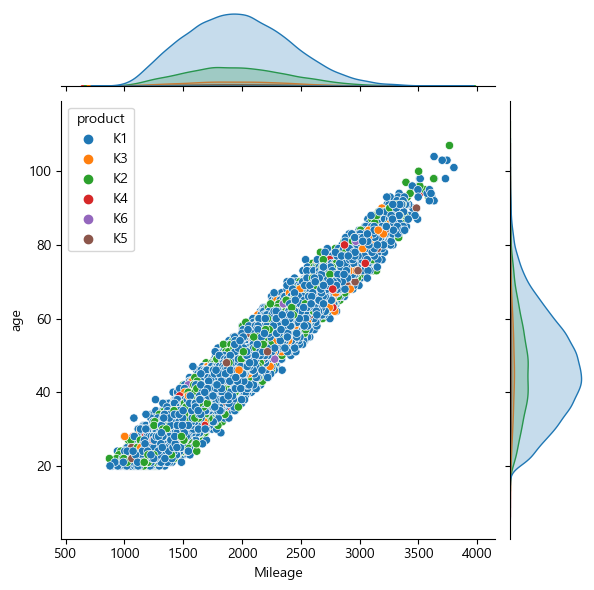

In [35]:
sns.jointplot(data=df_TOCC, x='Mileage', y='age', hue='product')
plt.show()

In [36]:
df_TOCC.corr()  #연속형 변수만 적용 (서로 상관관계/비례관계) 

C:\Users\02-19\AppData\Local\Temp\ipykernel_8188\2078867457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_TOCC.corr()  #연속형 변수만 적용 (서로 상관관계/비례관계)


,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


In [37]:
df_TOCC.describe().columns

Index(['id', 'Term', 'amount', 'overdue_count', 'credit rating', 'age',
       'Mileage'],
      dtype='object')

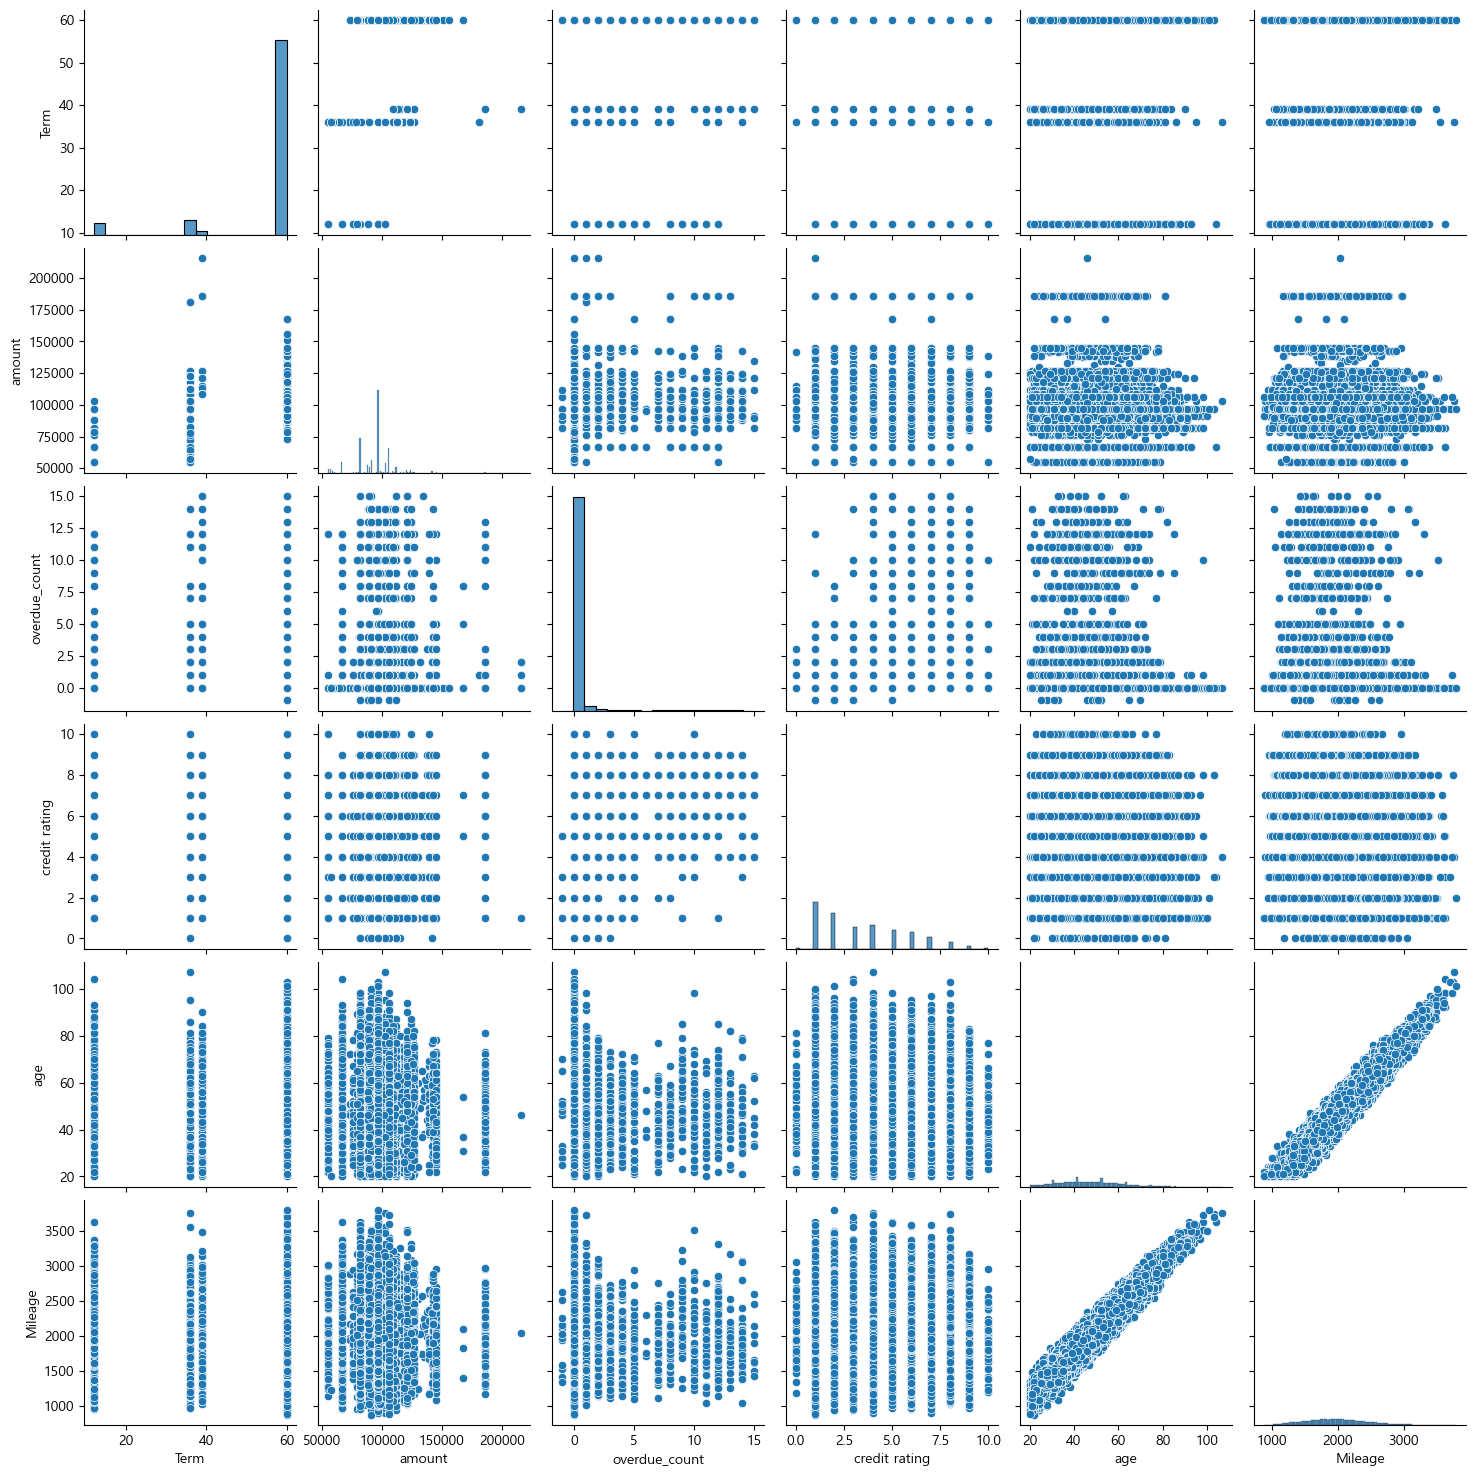

In [39]:
sns.pairplot(data=df_TOCC[['Term','amount', 'overdue_count', 'credit rating', 'age', 'Mileage']])
# sns.pairplot(data=df_TOCC[['Term','amount', 'overdue_count', 'credit rating', 'age', 'Mileage', 'product']]

### X(설명변수) / Y(목표변수) : 연속(순서)형 / 연속형

In [40]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [41]:
df_TOCC['datetime(timestamp)'] = pd.to_datetime(df_TOCC['datetime'])
df_TOCC['datetime(timestamp)']

0       2019-10-20
1       2019-10-20
2       2019-10-20
3       2019-10-20
4       2019-10-20
           ...    
51299   2020-02-03
51300   2020-02-03
51301   2020-02-03
51302   2020-02-03
51303   2020-02-03
Name: datetime(timestamp), Length: 51304, dtype: datetime64[ns]

#### lineplot

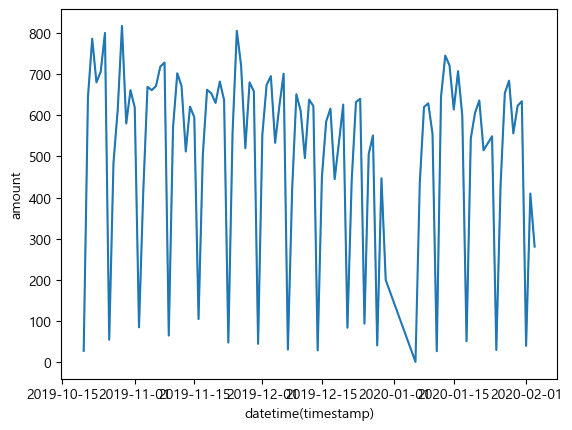

In [47]:
# sns.lineplot(data=df_TOCC, x='datetime(timestamp)', y='amount')
sns.lineplot(data=df_TOCC, x='datetime(timestamp)', y='amount', estimator=len)
plt.show()
# 날짜별로 주기적으로 0-100 사이로 떨어지는 것은 회사도 휴일이 있기 때문
# 0이 아닌 이유는 회사는 쉬지만 인터넷 거래는 휴일과 상관없기 때문

In [50]:
df_TOCC['datetime(timestamp)'].dt.isocalendar().week #주단위로 확인

0        42
1        42
2        42
3        42
4        42
         ..
51299     6
51300     6
51301     6
51302     6
51303     6
Name: week, Length: 51304, dtype: UInt32